## 4. Models for Stationary Time Series

**Exercise 4.1**.  Use first principles to find the autocorrelation function for the stationary process defined by

$$ Y_t = 5 + e_t - \frac{1}{2} e_{t - 1} + \frac{1}{4} e_{t - 2} $$

**Solution**. 

The variance is

$$ \gamma_0 
= \text{Var}[Y_t] 
= \text{Var}\left[ 5 + e_t - \frac{1}{2} e_{t - 1} + \frac{1}{4} e_{t - 2} \right]
= \text{Var}[e_t] + \frac{1}{4} \text{Var}[e_{t - 1}] + \frac{1}{16} \text{Var}[e_{t-2}] 
= \frac{21}{16} \sigma_e^2
$$

and the autocovariance is

$$ \gamma_k =
\text{Cov}[Y_t, Y_{t - k}] = \text{Cov}\left[ e_t - \frac{1}{2} e_{t - 1} + \frac{1}{4} e_{t - 2}, e_{t - k} - \frac{1}{2} e_{t - k - 1} + \frac{1}{4} e_{t - k - 2}\right]
$$

For $k = 1$,

$$ \gamma_1 = -\frac{1}{2} \text{Var}[e_{t - 1}] -\frac{1}{8} \text{Var}[e_{t - 2}] = -\frac{5}{8} \sigma_e^2 $$

For $k = 2$,

$$ \gamma_2 = \frac{1}{4} \text{Var}[e_{t - 2}] = \frac{1}{4} \sigma_e^2 $$

and the autocovariance is 0 for $k > 2$.

Therefore

$$ \gamma_k = \begin{cases}
(21 / 16) \sigma_e^2 &\text{for } k = 0 \\
-(5 / 8) \sigma_e^2 &\text{for } k = 1 \\
(1 / 4) \sigma_e^2 &\text{for } k = 2 \\
0 &\text{for } k > 2
\end{cases} $$

and the autocorrelation is

$$ \rho_k = \frac{\gamma_k}{\gamma_0} = \begin{cases}
-10 / 21 &\text{for } k = 1 \\
4 / 21 &\text{for } k = 2\\
0 &\text{for } k > 3
\end{cases} $$

**Exercise 4.2**.  Sketch the autocorrelation functions for the following MA(2) models with parameters as specified:

**(a)** $\theta_1 = 0.5$ and $\theta_2 = 0.4$.

**(b)** $\theta_1 = 1.2$ and $\theta_2 = -0.7$.

**(c)** $\theta_1 = -1$ and $\theta_2 = -0.6$.

**Solution**.

In [1]:
require(ggplot2)
require(latex2exp)
require(collections)
require(plot3d)

Loading required package: ggplot2

Loading required package: latex2exp

Loading required package: collections


Attaching package: 'collections'


The following object is masked from 'package:utils':

    stack


Loading required package: plot3d

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
"there is no package called 'plot3d'"


In [2]:
ma2_rho <- function(theta_1, theta_2) {
    function(k) {
        if (k == 0) { 
            1
        } else if (k == 1) {
            (-theta_1 + theta_1 * theta_2) / (1 + theta_1**2 + theta_2**2)
        } else if (k == 2) {
            -theta_2 / (1 + theta_1**2 + theta_2**2)
        } else {
            0
        }
    }
}

plot_ma2_acf <- function(theta_1, theta_2) {
    max_k = 12
    f = ma2_rho(theta_1, theta_2)
    k = seq(1, max_k)
    rho = sapply(k, f)
    
    options(repr.plot.width=12, repr.plot.height=4)
    p = ggplot() +
        geom_point(aes(x=k, y=rho), color='blue')
    for (i in 1:max_k) {
        p = p + geom_line(aes_string(x=k[i], y=c(0, rho[i])), color='blue')
    }
    p + geom_line(aes(x=k, y=0), color='blue', linetype='dashed') +
        xlab('Lag') + ylab(TeX('$\\rho_k$')) +
        ggtitle(TeX(paste('MA(2) ACF, ', '$(\\theta_1, \\theta_2) = (', theta_1, ', ', theta_2, ')$'))) +
        theme_bw() + theme(text = element_text(size=16), plot.title = element_text(hjust = 0.5))
}

**(a)**

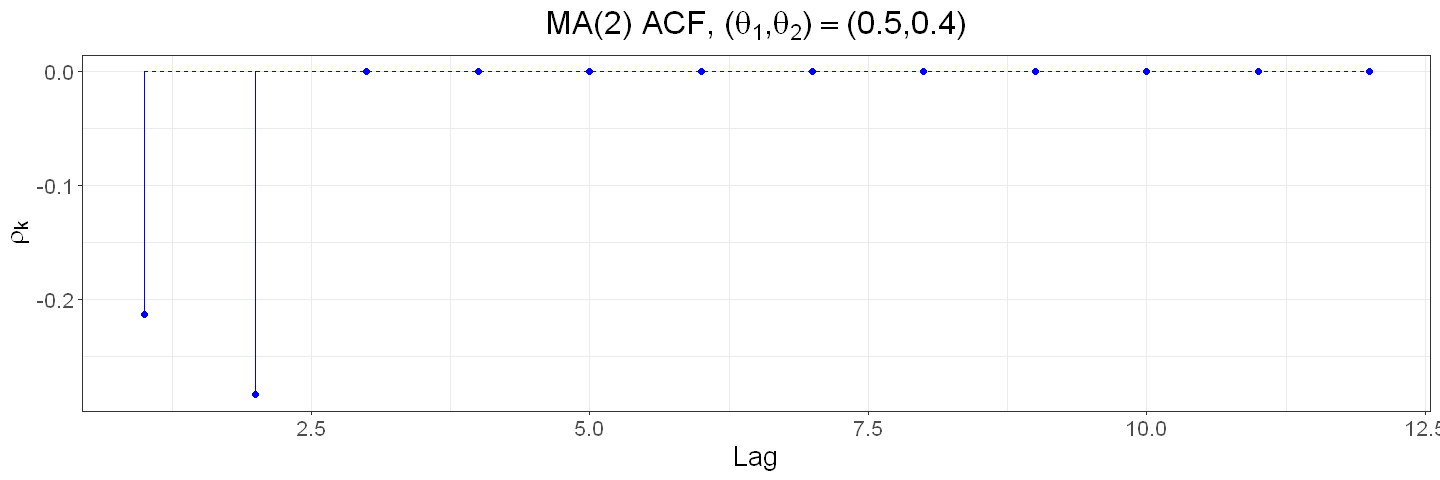

In [3]:
plot_ma2_acf(0.5, 0.4)

**(b)**

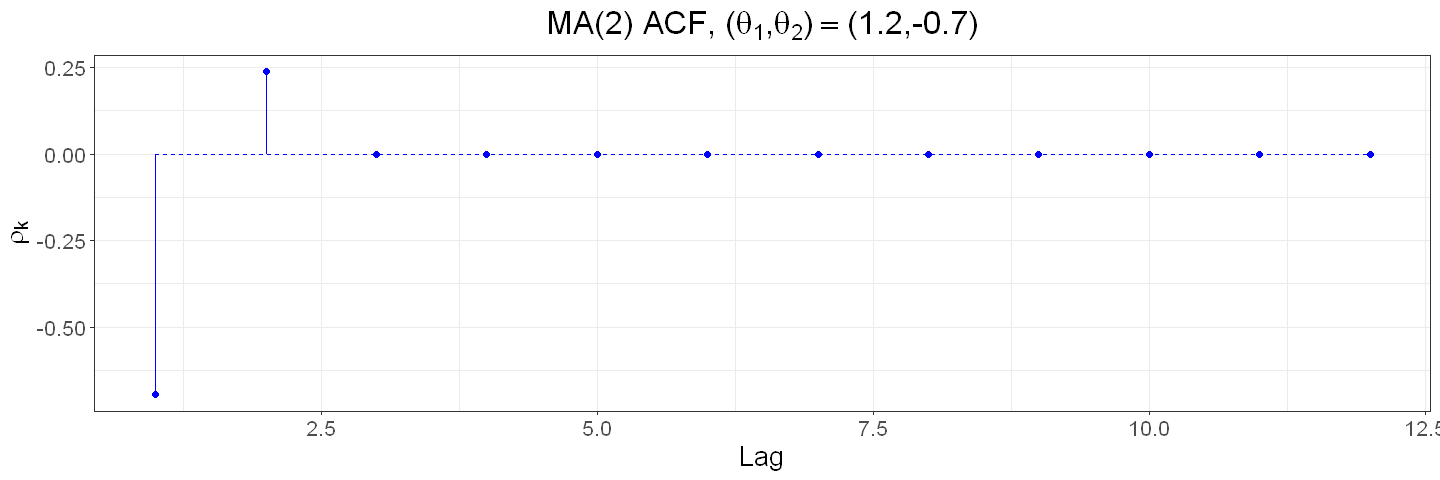

In [4]:
plot_ma2_acf(1.2, -0.7)

**(c)**

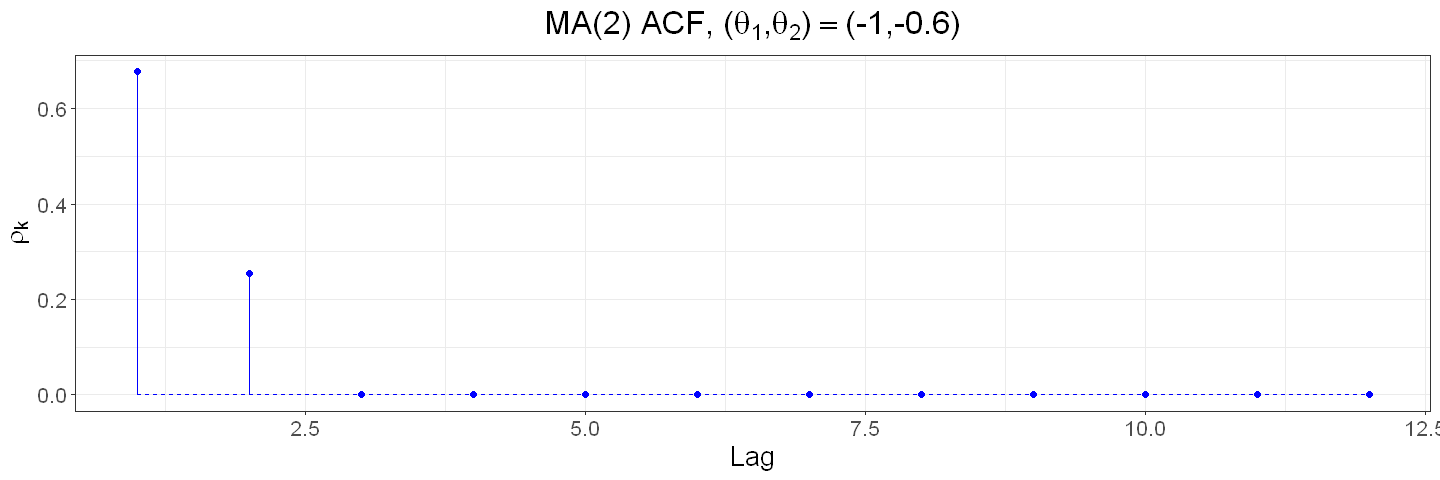

In [5]:
plot_ma2_acf(-1, -0.6)

**Exercise 4.3**.  Verify that for an MA(1) process

$$ \max_{-\infty < \theta < \infty} \rho_1 = 0.5 
\quad \text{and} \quad
\min_{-\infty < \theta < \infty} \rho_1 = -0.5 $$

**Solution**.  For a MA(1) process,

$$ \rho_1(\theta) = \frac{-\theta}{1 + \theta^2} $$

The derivative of this function is 

$$ \frac{d \rho_1(\theta)}{d\theta} = \frac{\theta^2 - 1}{(1 + \theta^2)^2} $$

which is only equal to zero on $\theta^2 = 1$, or $\theta = \pm 1$.  Therefore all global minimum and maximum values of $\rho_1$ are within $\theta \in \{-1, 1\}$.  It's easy to verify that $\rho_1(\theta_1 = -1) = 0.5$ and $\rho_1(\theta_1 = 1) = -0.5$, and so the result follows.

**Exercise 4.4**.  Show that when $\theta$ is replaced by $1 / \theta$, the autocorrelation function for an MA(1) process does not change.

**Solution**.  For a MA(1) process,

$$ \rho_1(\theta) = \frac{-\theta}{1 + \theta^2} $$

Therefore,

$$ \rho_1\left(\frac{1}{\theta}\right) = \frac{-\frac{1}{\theta}}{1 + \left(\frac{1}{\theta}\right)^2} =  \frac{-\theta}{1 + \theta^2} = \rho_1(\theta) $$

**Exercise 4.5**.  Calculate and sketch the autocorrelation functions for each of the following AR(1) models.  Plot for sufficient lags that the autocorrelation function has nearly died out.

**(a)** $\phi_1 = 0.6$.

**(b)** $\phi_1 = -0.6$.

**(c)** $\phi_1 = 0.95$. (Do out to 20 lags.)

**(d)** $\phi_3 = 0.3$.

**Solution**.

In [6]:
ar1_rho <- function(phi_1) {
    function(k) { phi_1**k }
}

plot_ar1_acf <- function(phi_1) {
    max_k = 20
    f = ar1_rho(phi_1)
    k = seq(1, max_k)
    rho = sapply(k, f)
    
    options(repr.plot.width=12, repr.plot.height=4)
    p = ggplot() +
        geom_point(aes(x=k, y=rho), color='blue')
    for (i in 1:max_k) {
        p = p + geom_line(aes_string(x=k[i], y=c(0, rho[i])), color='blue')
    }
    p + geom_line(aes(x=k, y=0), color='blue', linetype='dashed') +
        xlab('Lag') + ylab(TeX('$\\rho_k$')) +
        ggtitle(TeX(paste('AR(1) ACF, ', '$\\phi_1 = ', phi_1, '$'))) +
        theme_bw() + theme(text = element_text(size=16), plot.title = element_text(hjust = 0.5))
}

**(a)**

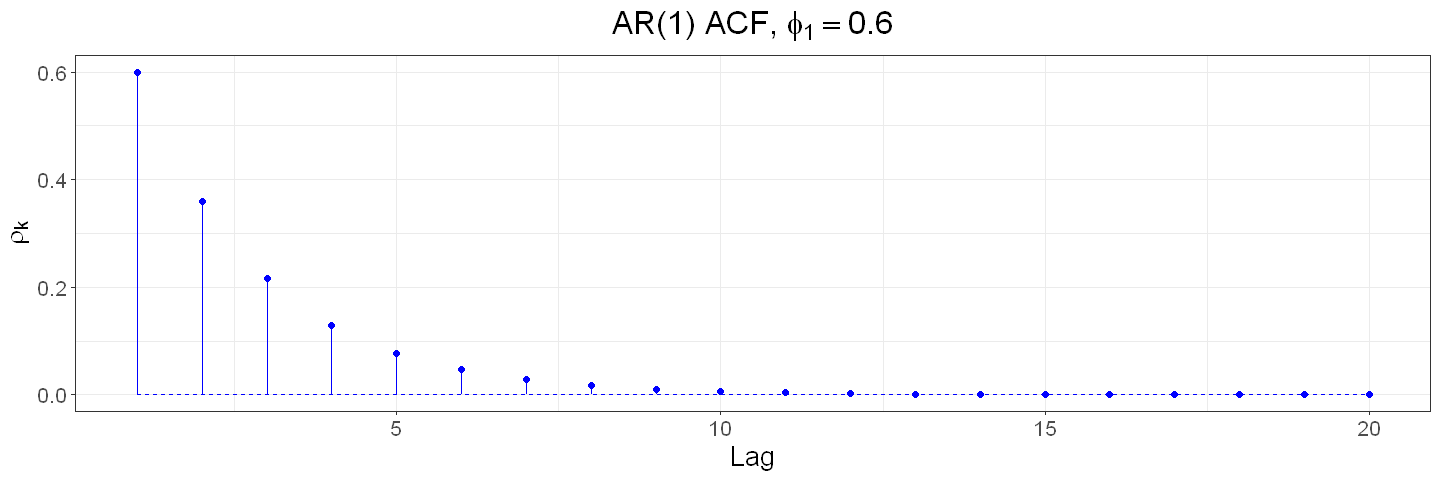

In [7]:
plot_ar1_acf(0.6)

**(b)**

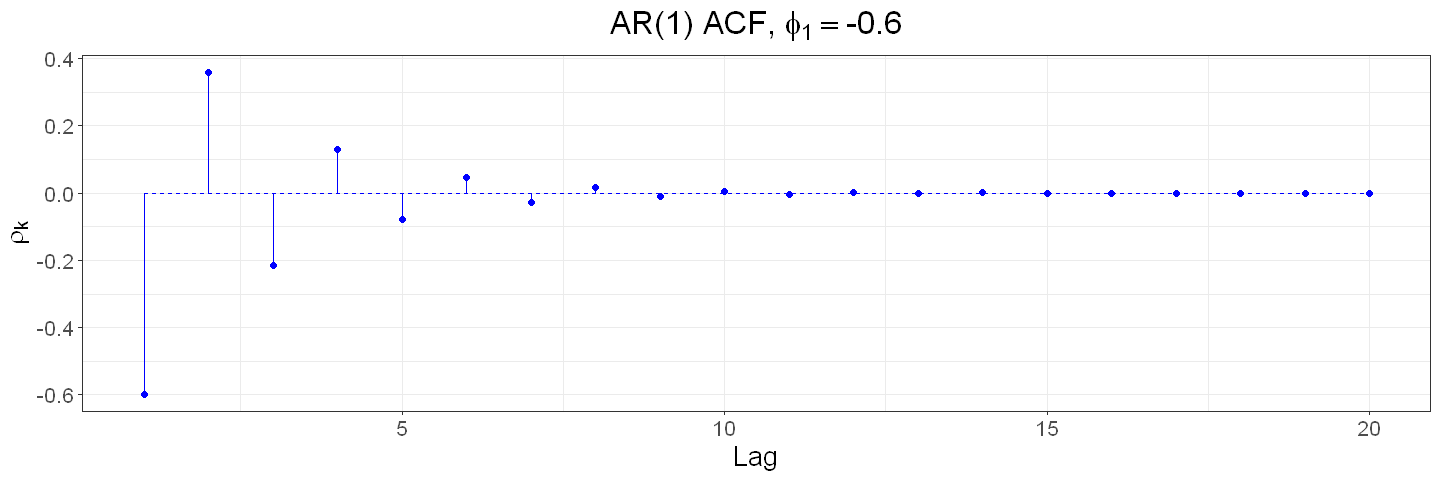

In [8]:
plot_ar1_acf(-0.6)

**(c)**

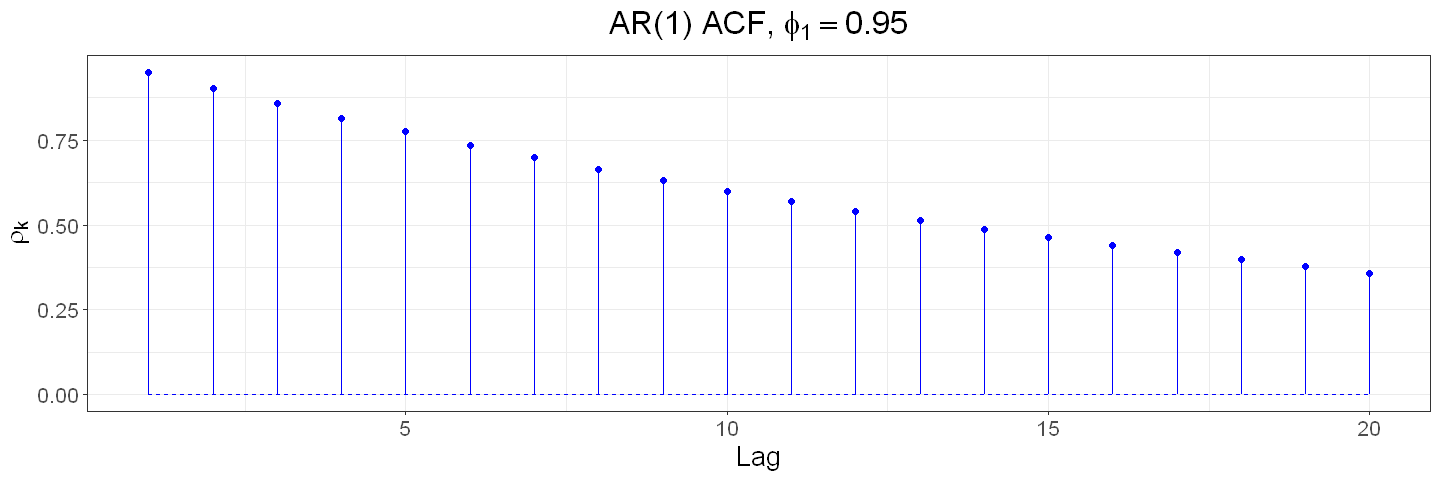

In [9]:
plot_ar1_acf(0.95)

**(d)**

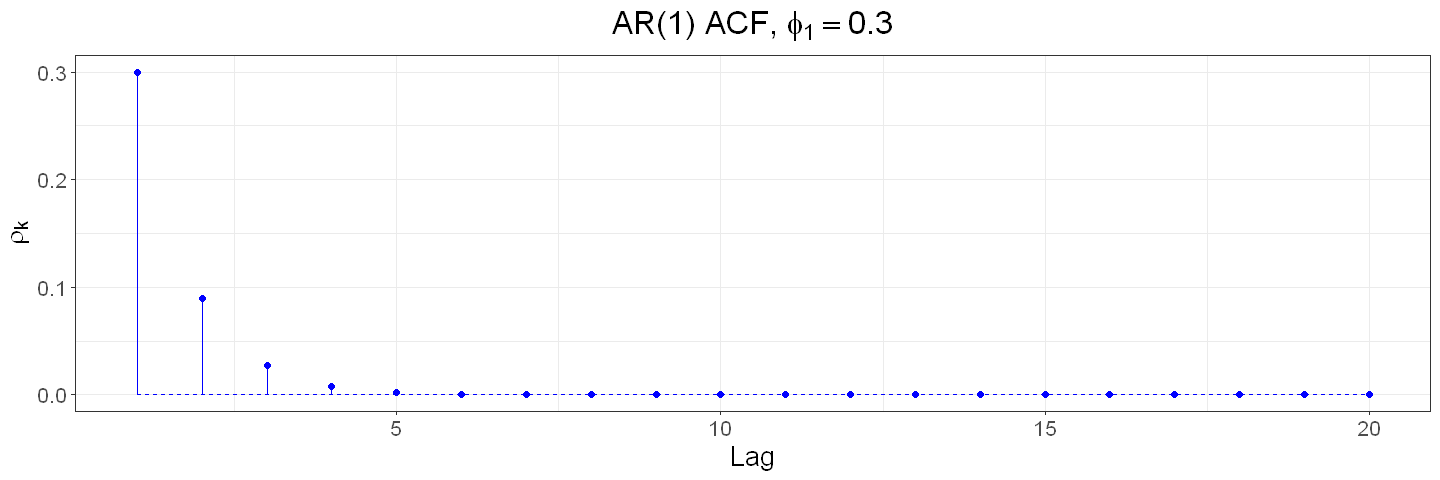

In [10]:
plot_ar1_acf(0.3)

**Exercise 4.6**.  Suppose that $\{Y_t\}$ is an AR(1) process with $-1 < \phi < +1$.

**(a)** Find the autocovariance function for $W_t = \nabla Y_t = Y_t - Y_{t - 1}$ in terms of $\phi$ and $\sigma_e^2$.

**(b)** In particular, show that $\text{Var}[W_t] = 2\sigma_e^2 / (1 + \phi)$.

**(a and b)**

Let $\omega_k$ be the autocovariance of $\{Y_t\}$.  Then:

$$
\begin{align}
\gamma_k = \text{Cov}[W_t, W_{t - k}] &= \text{Cov}[Y_t - Y_{t - 1}, Y_{t - k} - Y_{t - k - 1}] \\
&= \text{Cov}[Y_t, Y_{t - k}] - \text{Cov}[Y_t, Y_{t - k - 1}] - \text{Cov}[Y_{t - 1}, Y_{t - k}] + \text{Cov}[Y_{t - 1}, Y_{t - k - 1}] \\
&= 2\omega_k - \omega_{k + 1} - \omega_{k - 1}
\end{align}
$$

But $\{Y_t\}$ is a AR(1) process, so

$$ \omega_k = \phi^{|k|} \frac{\sigma_e^2}{1 - \phi^2} $$

In particular,

$$ \gamma_0 = 2 \frac{\sigma_e^2}{1 - \phi^2} - 2 \phi \frac{\sigma_e^2}{1 - \phi^2}  = 2 \sigma_e^2 \frac{1 - \phi}{(1 + \phi)(1 - \phi)} = \frac{2 \sigma_e^2}{1 + \phi} $$

and for $k > 0$,

$$ \gamma_k = 2 \phi^k \frac{\sigma_e^2}{1 - \phi^2} - \phi^{k - 1} (1 + \phi^2) \frac{\sigma_e^2}{1 - \phi^2}
= \sigma_e^2 \phi^{k - 1} \frac{2\phi - 1- \phi^2}{1 - \phi^2} 
= - \sigma_e^2 \phi^{k - 1} \frac{(1 - \phi)^2}{(1 + \phi)(1 - \phi)}
= \frac{- \sigma_e^2 \phi^{k - 1} (1 - \phi) }{1 + \phi}
$$

So:

$$ \gamma_k = \begin{cases}
\frac{2 \sigma_e^2}{1 + \phi} &\text{for } k = 0 \\
\frac{- \sigma_e^2 \phi^{k - 1} (1 - \phi) }{1 + \phi} & \text{for } k > 1
\end{cases} $$

**Exercise 4.7**.  Describe the important characteristics of the autocorrelation function for the following models:

**(a)** MA(1)

**(b)** MA(2)

**(c)** AR(1)

**(d)** AR(2)

**(e)** ARMA(1, 1)

**Solution**.

**(a)**  MA(1) autocorrelation function has only the first lag as non-negative,

$$ \rho_1 = \frac{-\theta}{1 + \theta^2} 
\quad \text{and} \quad
\rho_k = 0 \quad \text{for } k > 1$$

This lag is at most 0.5, and at minimum -0.5.  Those extremes are reached at $\theta = -1$ and $\theta = 1$, respectively.

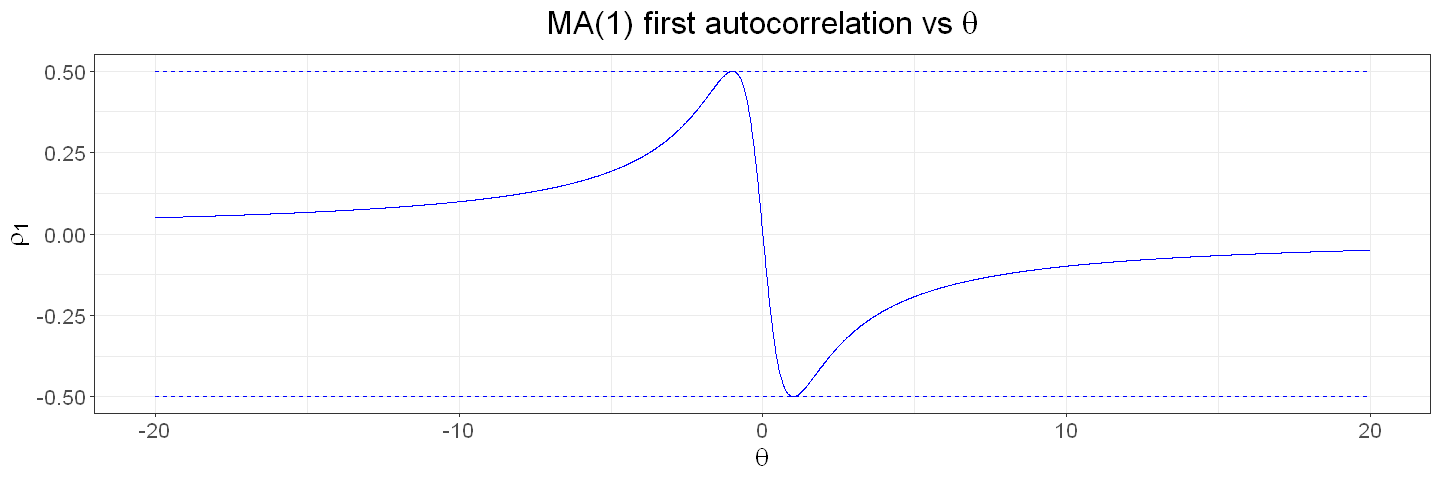

In [11]:
theta = seq(-20, 20, by=1e-2)
rho_1 = -theta / (1 + theta**2)

ggplot() +
    geom_line(aes(x=theta, y=rho_1), color='blue') +
    geom_line(aes(x=c(min(theta), max(theta)), y=-0.5), color='blue', linetype='dashed') +
    geom_line(aes(x=c(min(theta), max(theta)), y=0.5), color='blue', linetype='dashed') +
    xlab(TeX('$\\theta$')) + ylab(TeX('$\\rho_1$')) +
    ggtitle(TeX(paste('MA(1) first autocorrelation vs', '$\\theta$'))) +
    theme_bw() + theme(text = element_text(size=16), plot.title = element_text(hjust = 0.5))

**(b)**  MA(2) autocorrelation function only has the first two lags as non-negative,

$$
\rho_1 = \frac{\theta_1 (\theta_2 - 1)}{1 + \theta_1^2 + \theta_2^2},
\quad
\rho_2 = \frac{-\theta_2}{1 + \theta_1^2 + \theta_2^2},
\quad
\rho_k = 0 \quad \text{for } k > 2
$$

The bounds on these values are:

$$ -\frac{1}{\sqrt{2}} \leq \rho_1 \leq \frac{1}{\sqrt{2}} 
\quad \text{and} \quad
-\frac{1}{2} \leq \rho_2 \leq \frac{1}{2}
$$

with limit values for $\rho_1$ reached at

$$
\underset{\theta_1, \theta_2}{\text{argmax}} \; \rho_1 = \left( -\sqrt{2}, -1 \right)
\quad \text{and} \quad
\underset{\theta_1, \theta_2}{\text{argmin}} \; \rho_1 = \left( \sqrt{2}, -1 \right)
$$

and limit values for $\rho_2$ reached at

$$
\underset{\theta_1, \theta_2}{\text{argmax}} \; \rho_2 = \left( 0, -1 \right)
\quad \text{and} \quad
\underset{\theta_1, \theta_2}{\text{argmin}} \; \rho_2 = \left( 0, 1 \right)
$$

The scenarios that maximize and minimize $\rho_2$ can be thought of as two MA(1) processes $\{A_t\}$ and $\{B_t\}$ with interleaving elements: $Y_{2t} = A_t$ and $Y_{2t + 1} = B_t$.

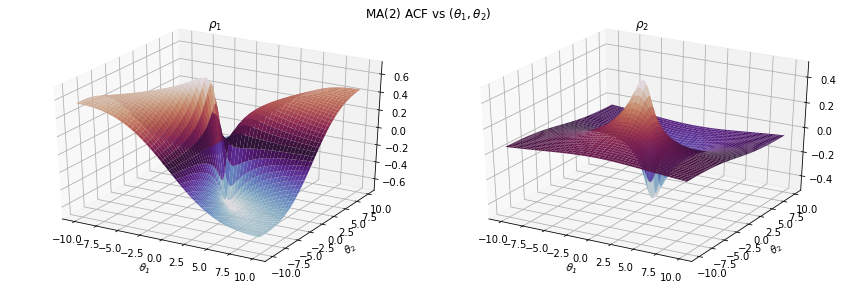

**(c)**  Note that stationarity in AR(1) requires $|\phi| < 1$.  The autocorrelation function for the AR(1) process is a series of decaying powers of $\phi$,

$$ \gamma_k = \phi^k $$

For positive $\phi$, the values are all positive; for negative $\phi$, they oscillate.

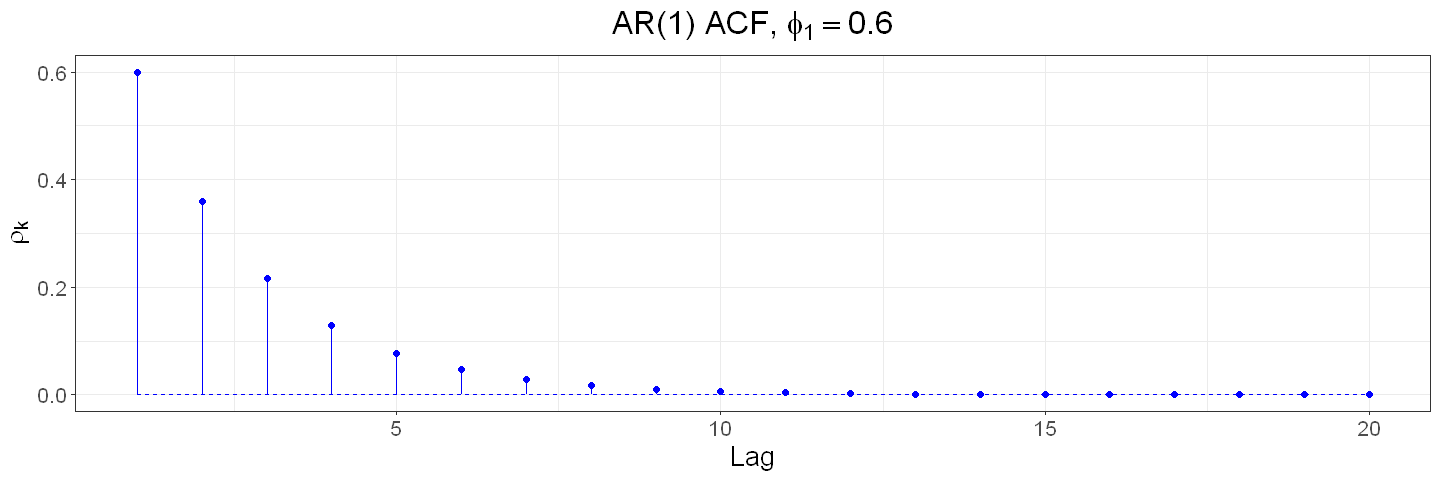

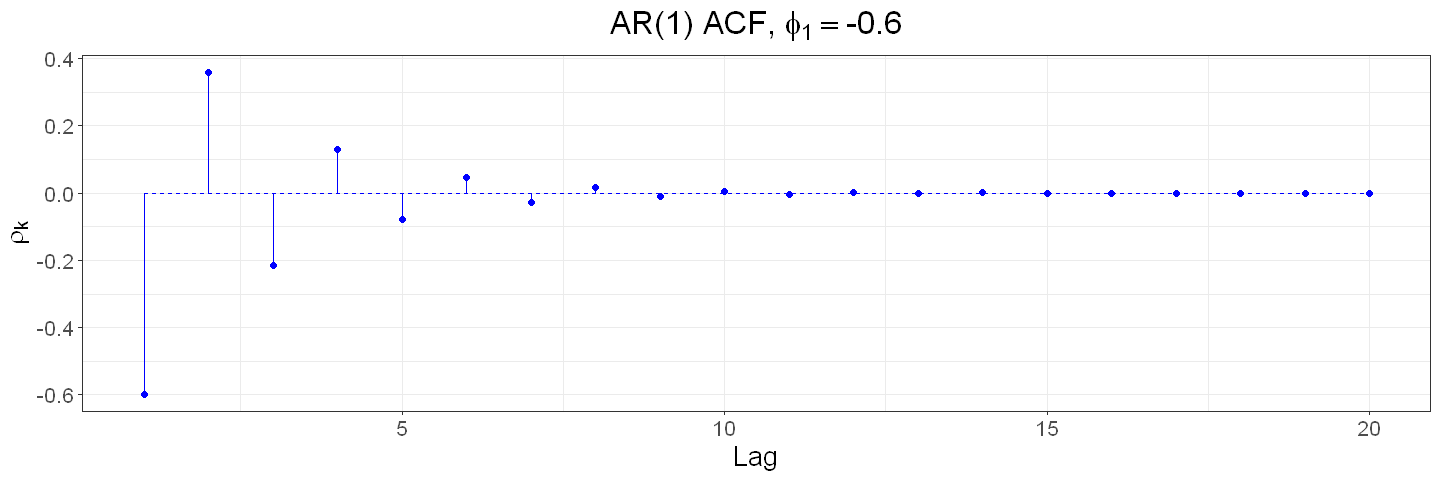

In [12]:
plot_ar1_acf(0.6)
plot_ar1_acf(-0.6)

**(d)**  The stationarity conditions for the AR(2) process are:

- $\phi_1 + \phi_2 < 1$
- $\phi_2 - \phi_1 < 1$
- $|\phi_2| < 1$

The autocorrelation coefficients satisfy the recursion

$$ \rho_k = \phi_1 \rho_{k - 1} + \phi_2 \rho_{k - 2} $$

with initial values

$$ \rho_0 = 1
\quad \text{and} \quad
\rho_1 = \frac{\phi_1}{1 - \phi_2}$$

To solve the recursion, if the characteristic equation $1 - \phi_1 x - \phi_2 x^2 = 0$ has inverse roots $G_1, G_2$, then for distinct roots

$$ \rho_k = \frac{(1 - G_2^2)G_1^{k + 1} + (1 - G_1^2)G_2^{k + 1}}{(G_1 - G_2)(1 + G_1 G_2)} $$

and for identical roots

$$ \rho_k = \left( 1 + \frac{1 + \phi_2}{1 - \phi_2} k \right)\left( \frac{\phi_1}{2} \right)^k $$

In either case, $\lim_{k \rightarrow \infty} \rho_k = 0$, though oscillations may occur.

In [13]:
ar2_rho <- function(phi_1, phi_2) {
    memoized = dict()
    f <- function(k) {
        if (k == 0) {
            1
        } else if (k == 1) {
            phi_1 / (1 - phi_2)
        } else {
            phi_1 * f(k - 1) + phi_2 * f(k - 2)
        }
    }
    
    function(k) {
        key = as.character(k)
        if (memoized$has(key)) {
            memoized$get(key)
        } else {
            value = f(k)
            memoized$set(key, value)
            value
        }
    }
}

plot_ar2_acf <- function(phi_1, phi_2) {
    max_k = 20
    f = ar2_rho(phi_1, phi_2)
    k = seq(1, max_k)
    rho = sapply(k, f)
    
    options(repr.plot.width=12, repr.plot.height=4)
    p = ggplot() +
        geom_point(aes(x=k, y=rho), color='blue')
    for (i in 1:max_k) {
        p = p + geom_line(aes_string(x=k[i], y=c(0, rho[i])), color='blue')
    }
    p + geom_line(aes(x=k, y=0), color='blue', linetype='dashed') +
        xlab('Lag') + ylab(TeX('$\\rho_k$')) +
        ggtitle(TeX(paste('AR(2) ACF, ', '$(\\phi_1, \\phi_2) = (', phi_1, ', ', phi_2, ')$'))) +
        theme_bw() + theme(text = element_text(size=16), plot.title = element_text(hjust = 0.5))
}

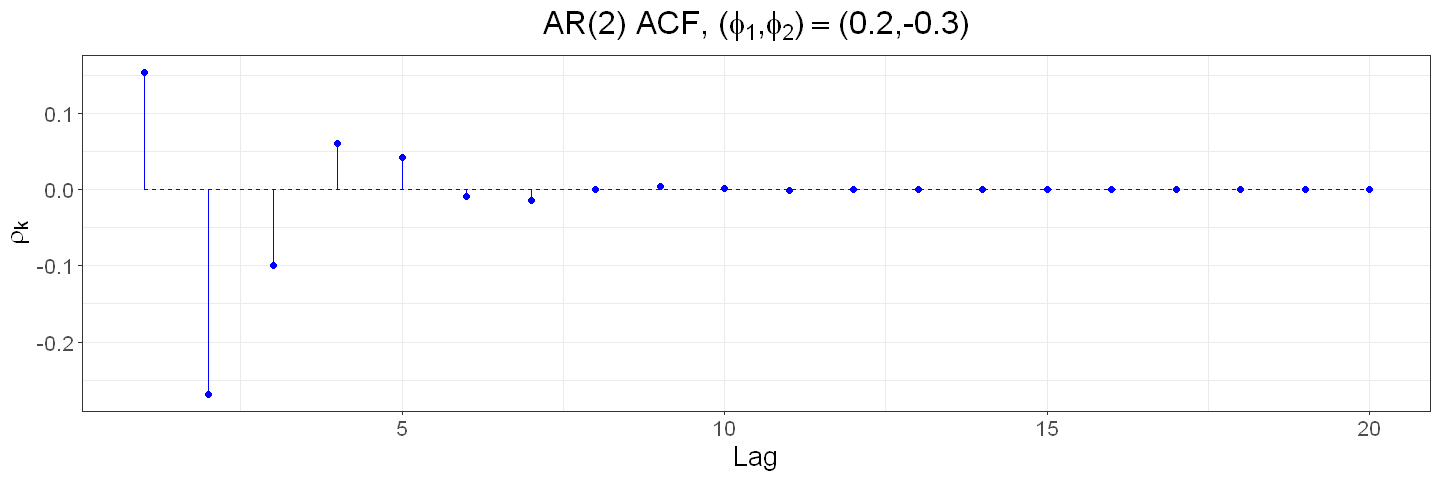

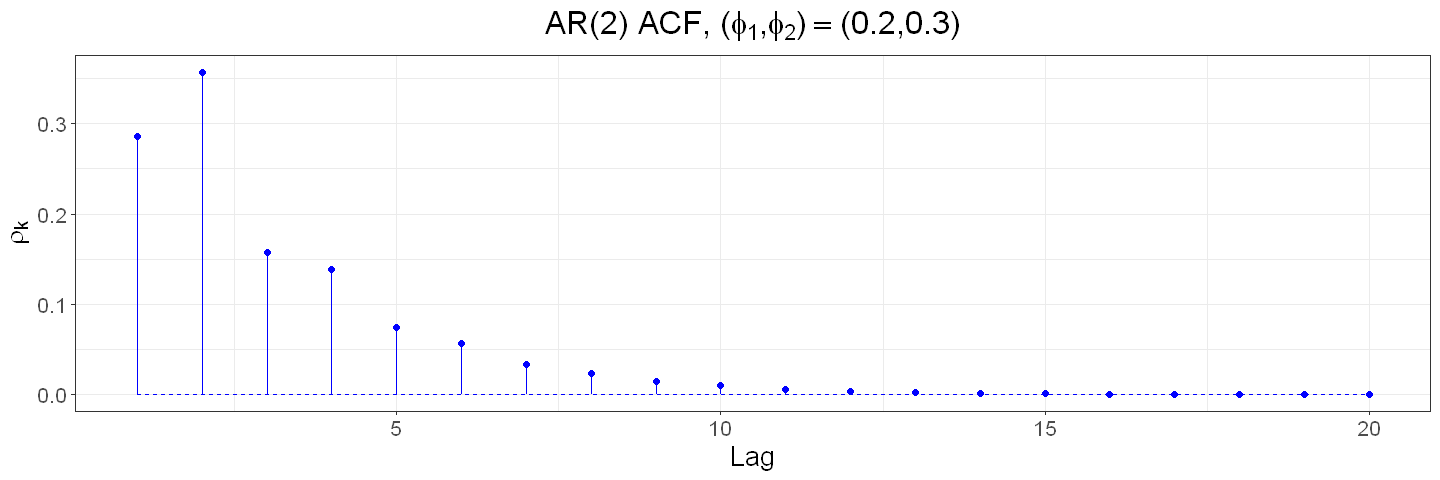

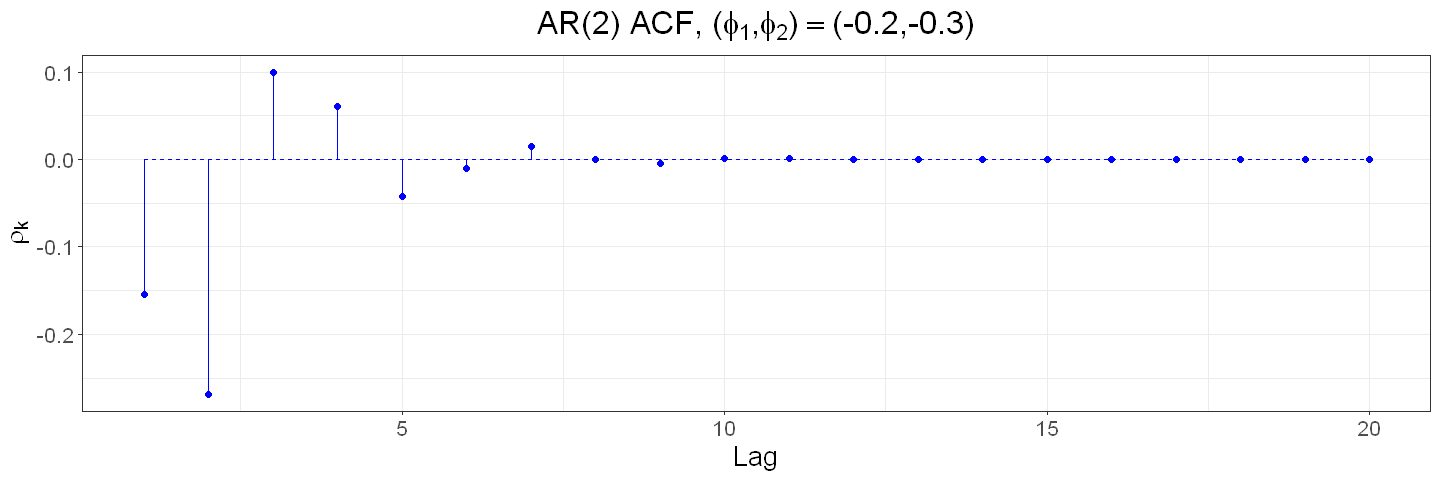

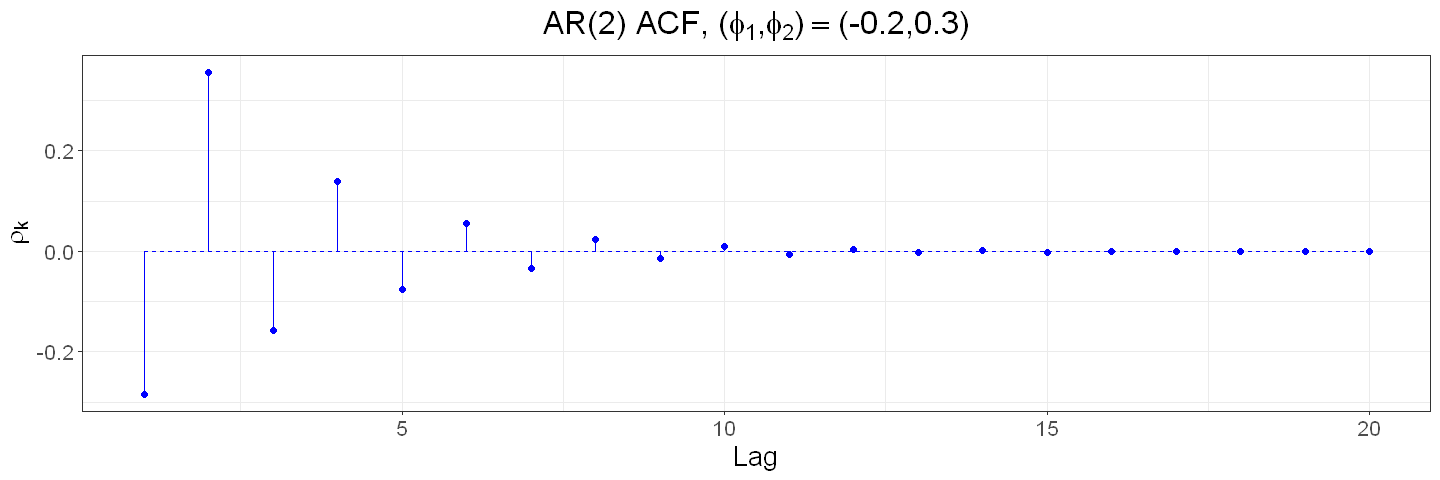

In [14]:
plot_ar2_acf(0.2, -0.3)
plot_ar2_acf(0.2, 0.3)
plot_ar2_acf(-0.2, -0.3)
plot_ar2_acf(-0.2, 0.3)

**(e)**  The ARMA(1) has the autocorrelation function
​
$$ \rho_k = \frac{(1 - \theta \phi)(\theta - \phi)}{1 - 2 \theta \phi + \theta^2} \phi^{k - 1} \quad \text{for } k \geq 1$$
​
which decays exponentially as the lag $k$ increases.  The damping factor is $\phi$, but decay starts from initial value $\rho_1$, which also depends on $\theta$.

In [15]:
arma11_rho <- function(theta, phi) {
    function(k) {
        if (k == 0) { 
            1
        } else {
            phi**(k - 1) * (1 - theta * phi) * (theta - phi) / (1 - 2 * theta * phi + theta**2)
        }
    }
}

plot_arma11_acf <- function(theta, phi) {
    max_k = 20
    f = arma11_rho(theta, phi)
    k = seq(1, max_k)
    rho = sapply(k, f)
    
    options(repr.plot.width=12, repr.plot.height=4)
    p = ggplot() +
        geom_point(aes(x=k, y=rho), color='blue')
    for (i in 1:max_k) {
        p = p + geom_line(aes_string(x=k[i], y=c(0, rho[i])), color='blue')
    }
    p + geom_line(aes(x=k, y=0), color='blue', linetype='dashed') +
        xlab('Lag') + ylab(TeX('$\\rho_k$')) +
        ggtitle(TeX(paste('ARMA(1, 1) ACF, ', '$(\\theta, \\phi) = (', theta, ', ', phi, ')$'))) +
        theme_bw() + theme(text = element_text(size=16), plot.title = element_text(hjust = 0.5))
}

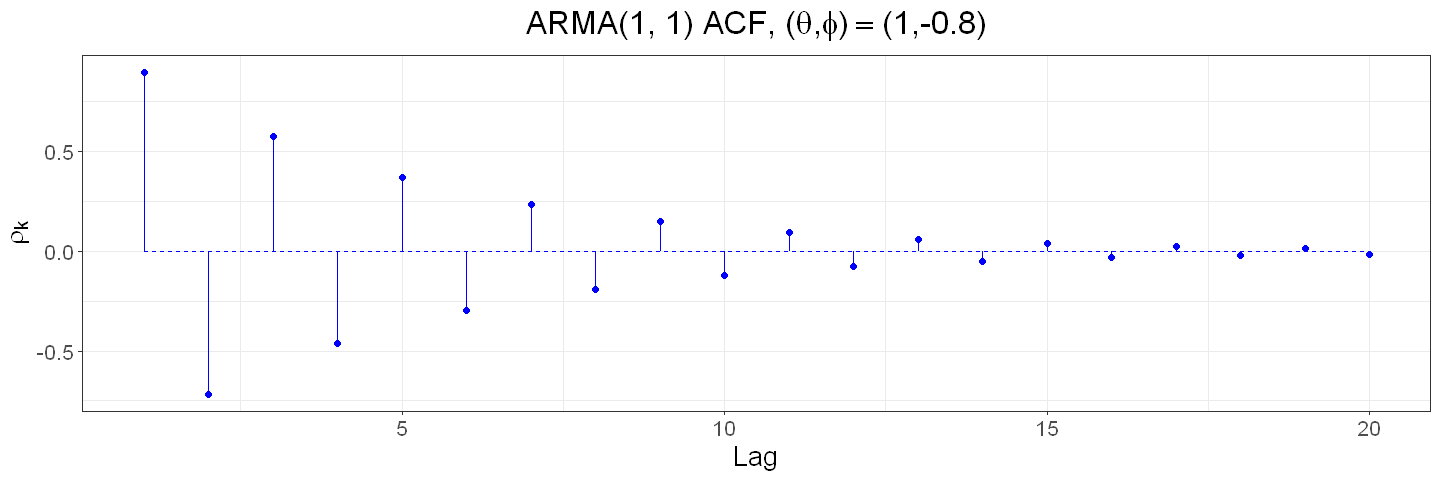

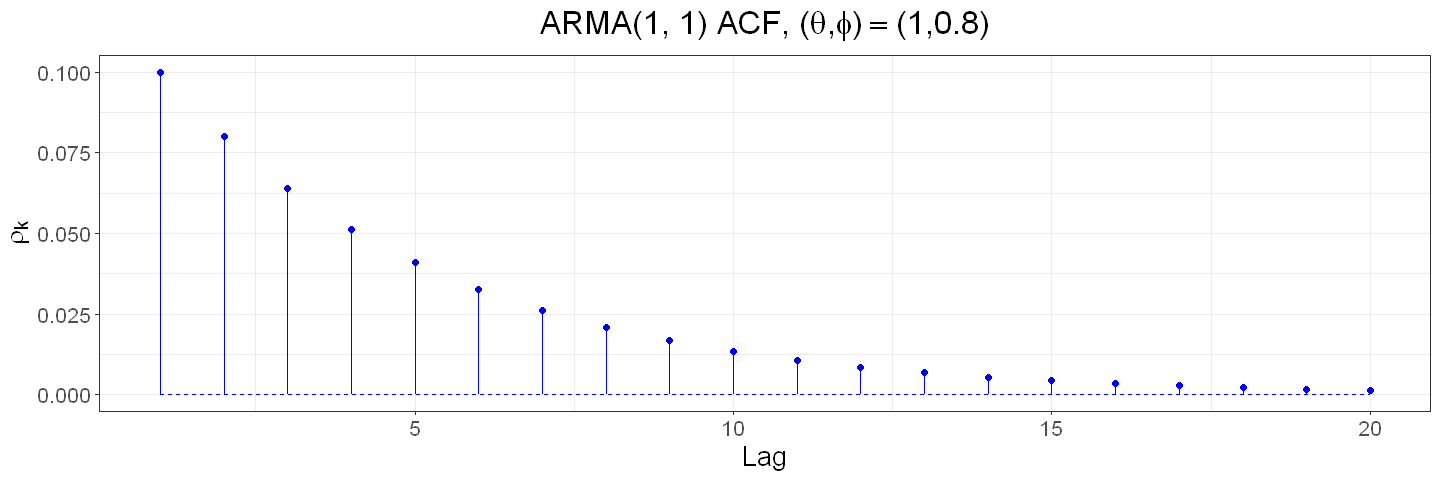

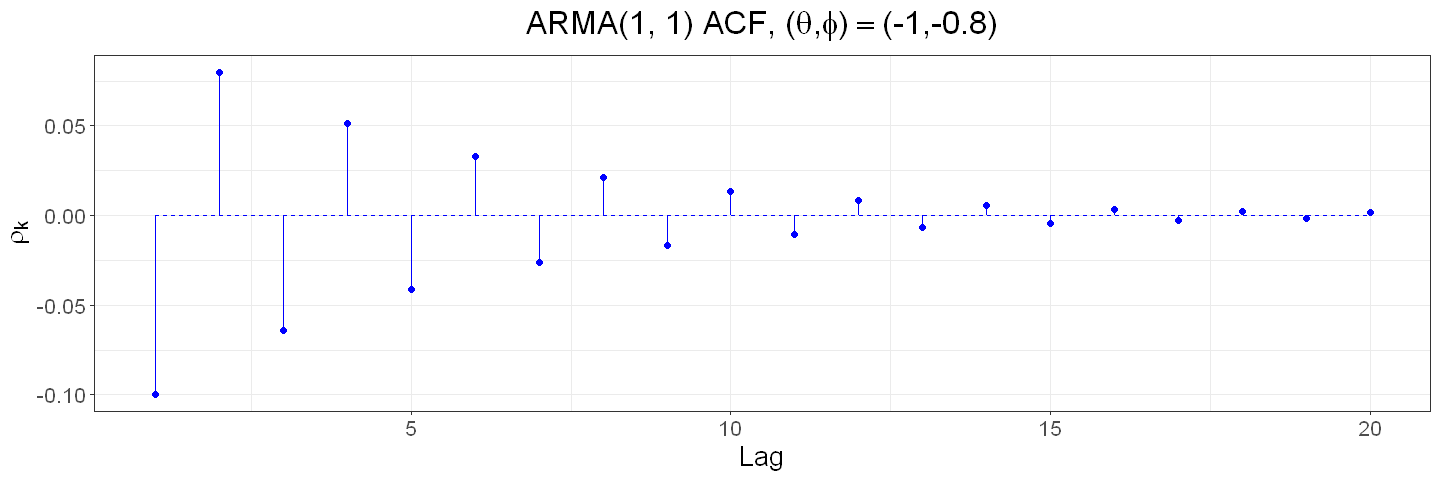

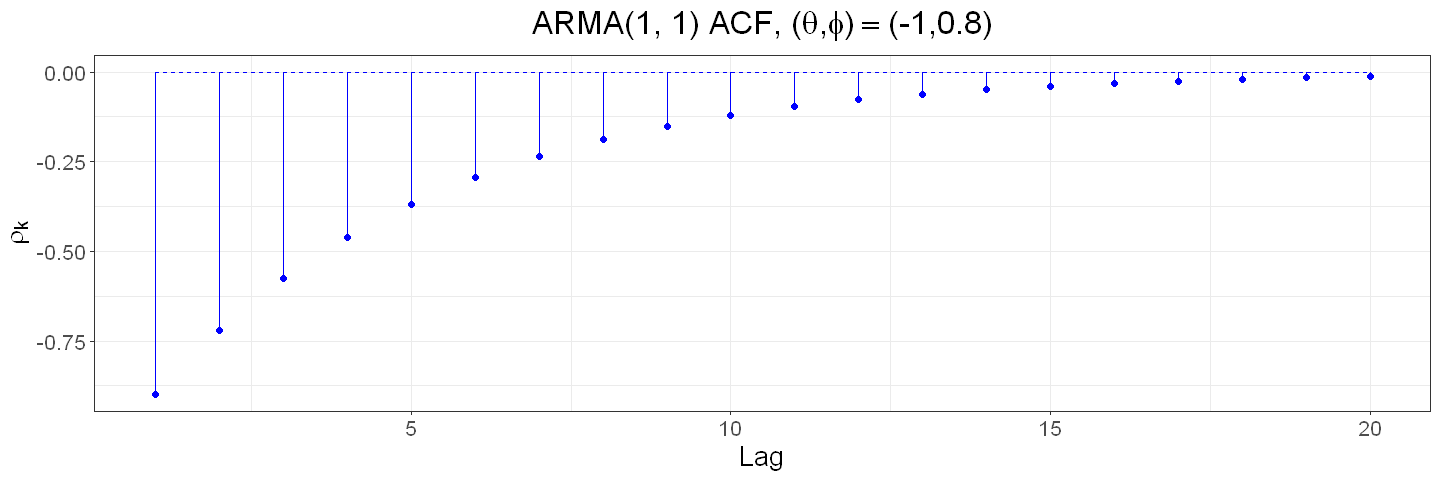

In [16]:
plot_arma11_acf(1, -0.8)
plot_arma11_acf(1, 0.8)
plot_arma11_acf(-1, -0.8)
plot_arma11_acf(-1, 0.8)

**Exercise 4.8**.  Let $\{Y_t\}$ be an AR(2) process of the special form $Y_t = \phi_2 Y_{t-2} + e_t$.  Use first principles to find the range of values of $\phi_2$ for which the process is stationary.

**Solution**.  We can decompose such a process into two independent series, $\{A_t\}$ and $\{B_t\}$, where $A_t = Y_{2t}$ and $B_t = Y_{2t + 1}$.  We then have

$$ A_t = \phi_2 A_{t - 1} + e_t \quad \text{and} \quad B_t = \phi_2 B_{t - 1} + e_t $$

We have that $\{Y_t\}$ is stationary only if both $\{A_t\}$ and $\{B_t\}$ are stationary -- which occurs only if $|\phi_2| < 1$, using stationary conditions for AR(1).

Note that this result is equivalent to using the stationary conditions with $\phi_1$ set to 0:

- $\phi_1 + \phi_2 < 1$
- $\phi_2 - \phi_1 < 1$
- $|\phi_2| < 1$

**Exercise 4.9**.  Use the recursive formula of Equation (4.3.13) to calculate and then sketch the autocorrelation function for the following AR(2) models with parameters as specified.  In each case, specify whether the roots of the characteristic equation are real or complex.  If the roots are complex, find the damping factor, $R$, and frequency, $\Theta$, for the corresponding autocorrelation function when expressed as in Equation (4.3.17), on page 73.

**(a)** $\phi_1 = 0.6$ and $\phi_2 = 0.3$.

**(b)** $\phi_1 = -0.4$ and $\phi_2 = 0.5$.

**(c)** $\phi_1 = 1.2$ and $\phi_2 = -0.7$.

**(d)** $\phi_1 = -1$ and $\phi_2 = -0.6$.

**(e)** $\phi_1 = 0.5$ and $\phi_2 = -0.9$.

**(f)** $\phi_1 = - 0.5$ and $\phi_2 = -0.6$.

**Solution**.

In [17]:
is_stationary <- function(phi_1, phi_2) { 
    (phi_1 + phi_2 < 1) & (phi_2 - phi_1 < 1) & (abs(phi_2) < 1)
}

has_complex_roots <- function(phi_1, phi_2) {
    phi_1**2 + 4 * phi_2 < 0
}

damping_factor <- function(phi_1, phi_2) {
    sqrt(-phi_2)
}

frequency <- function(phi_1, phi_2) {
    acos(phi_1 / (2 * sqrt(-phi_2)))
}

phase <- function(phi_1, phi_2) {
    atan((1 - phi_2) / (1 + phi_2))
}

do_analysis <- function(phi_1, phi_2) {
    if (!is_stationary(phi_1, phi_2)) {
        print("Not stationary")
    } else if (has_complex_roots(phi_1, phi_2)) {
        print("Complex roots")
        print(paste("Damping factor:", damping_factor(phi_1, phi_2)))
        print(paste("Frequency:", frequency(phi_1, phi_2)))
        print(paste("Phase:", phase(phi_1, phi_2)))
    } else {
        print("Real roots")
    }
}

**(a)**

[1] "Real roots"


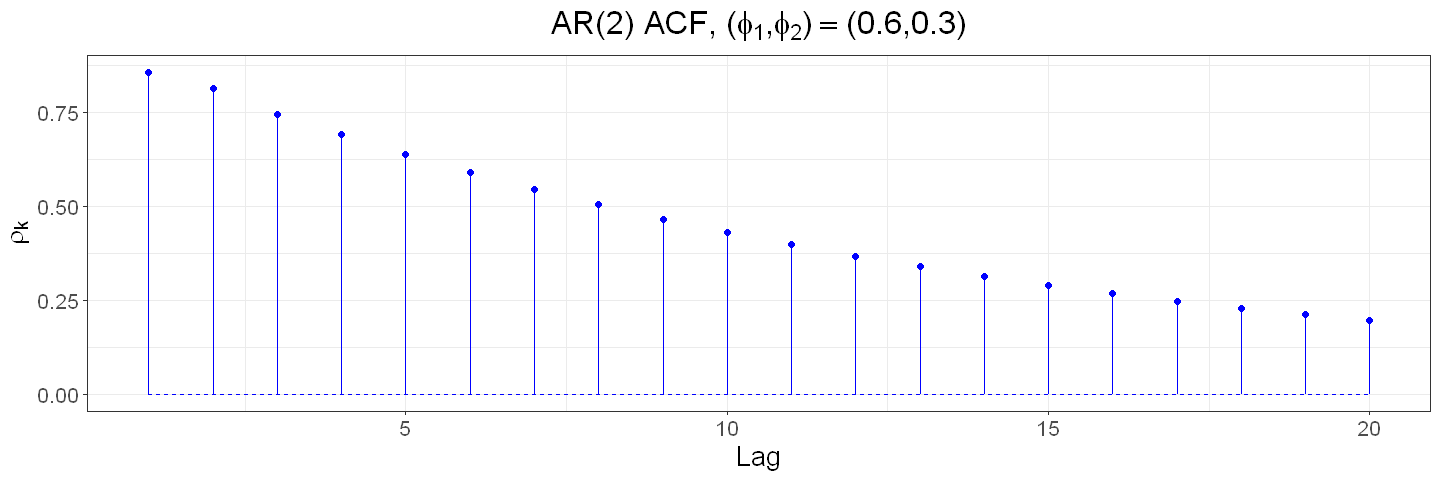

In [18]:
phi_1 = 0.6
phi_2 = 0.3
plot_ar2_acf(phi_1, phi_2)
do_analysis(phi_1, phi_2)

**(b)**

[1] "Real roots"


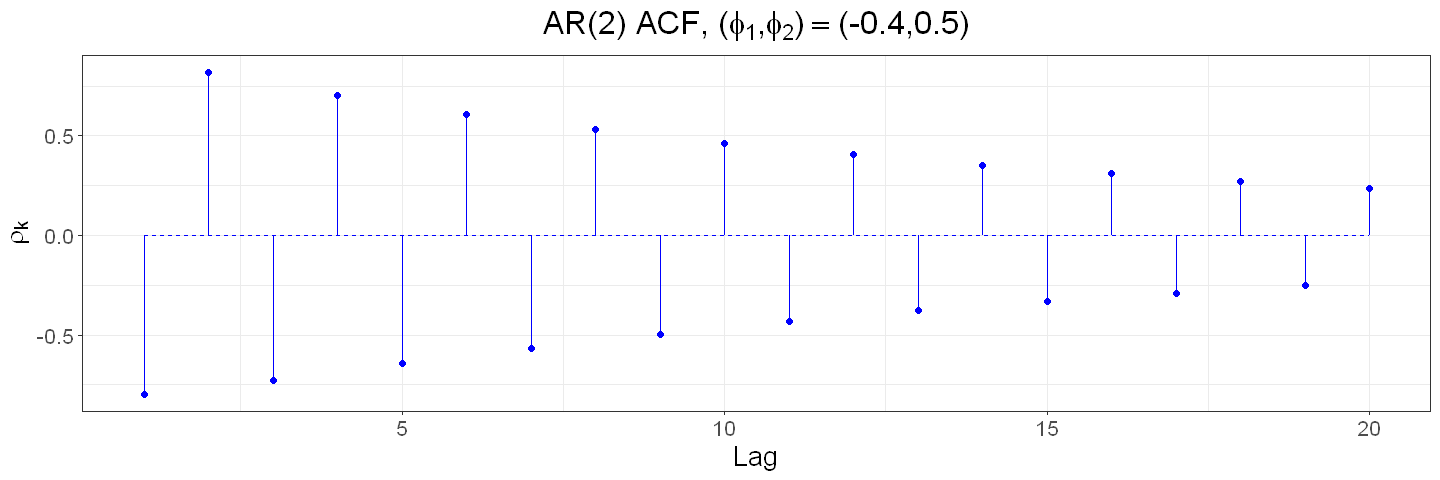

In [19]:
phi_1 = -0.4
phi_2 = 0.5
plot_ar2_acf(phi_1, phi_2)
do_analysis(phi_1, phi_2)

**(c)**

[1] "Complex roots"
[1] "Damping factor: 0.836660026534076"
[1] "Frequency: 0.771110504762802"
[1] "Phase: 1.39612412778666"


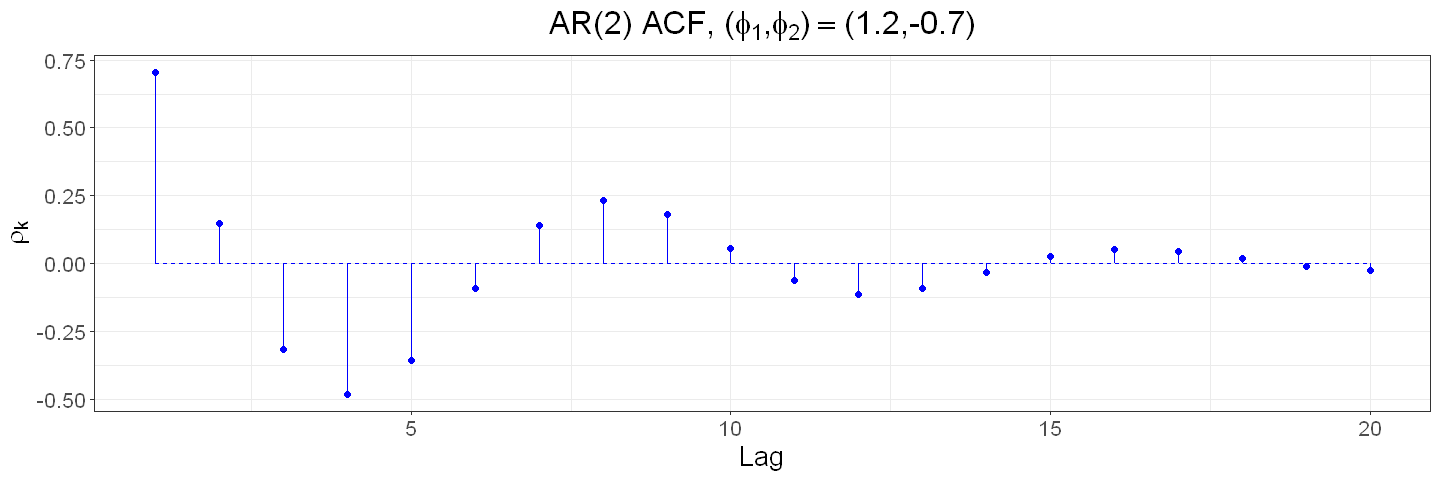

In [20]:
phi_1 = 1.2
phi_2 = -0.7
plot_ar2_acf(phi_1, phi_2)
do_analysis(phi_1, phi_2)

**(d)**

[1] "Complex roots"
[1] "Damping factor: 0.774596669241483"
[1] "Frequency: 2.2724704505825"
[1] "Phase: 1.32581766366803"


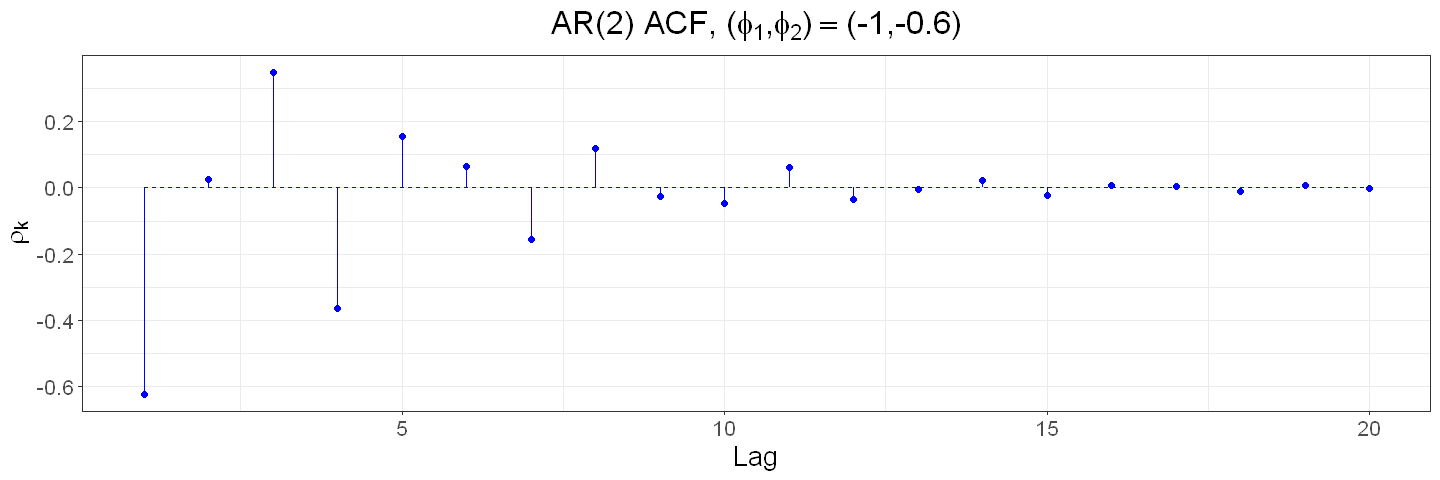

In [21]:
phi_1 = -1
phi_2 = -0.6
plot_ar2_acf(phi_1, phi_2)
do_analysis(phi_1, phi_2)

**(e)**

[1] "Complex roots"
[1] "Damping factor: 0.948683298050514"
[1] "Frequency: 1.30412370233957"
[1] "Phase: 1.51821326518395"


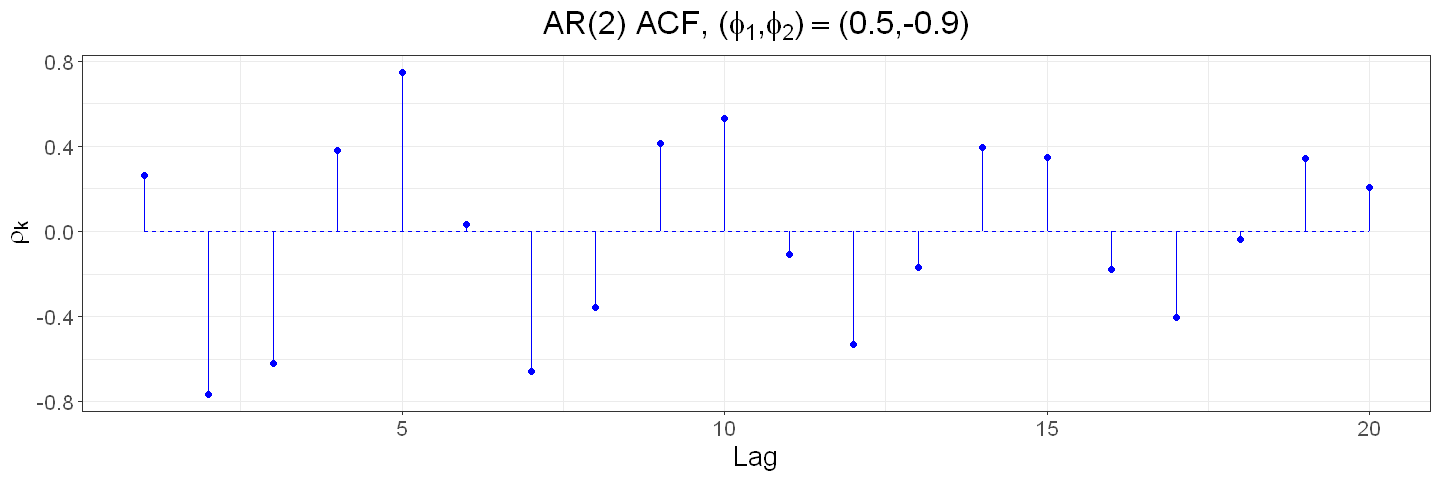

In [22]:
phi_1 = 0.5
phi_2 = -0.9
plot_ar2_acf(phi_1, phi_2)
do_analysis(phi_1, phi_2)

**(f)**

[1] "Complex roots"
[1] "Damping factor: 0.774596669241483"
[1] "Frequency: 1.89942840341765"
[1] "Phase: 1.32581766366803"


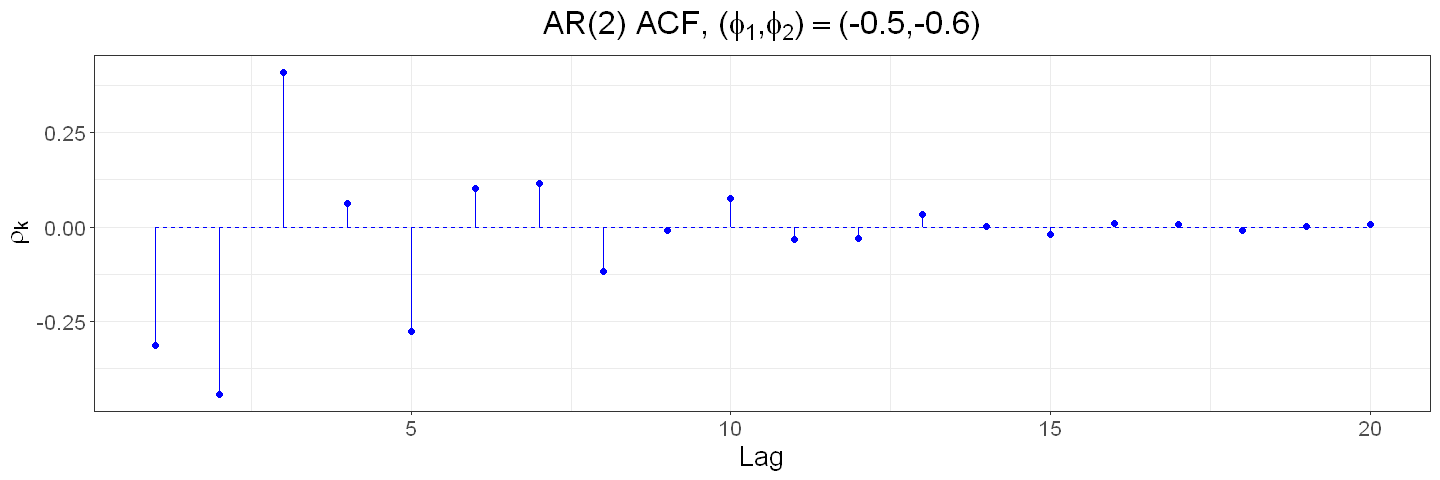

In [23]:
phi_1 = -0.5
phi_2 = -0.6
plot_ar2_acf(phi_1, phi_2)
do_analysis(phi_1, phi_2)

**Exercise 4.10**.  Sketch the autocorrelation function for each of the following ARMA models:

**(a)** ARMA(1, 1) with $\phi = 0.7$ and $\theta = 0.4$.

**(b)** ARMA(1, 1) with $\phi = 0.7$ and $\theta = -0.4$.

**Solution**.

**(a)**

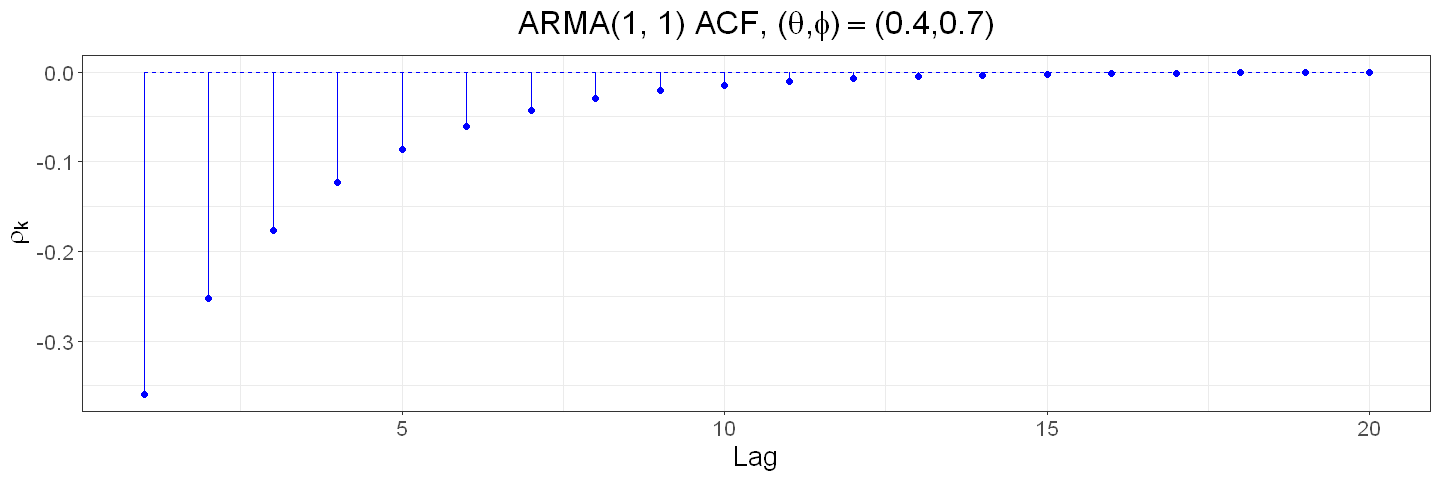

In [24]:
plot_arma11_acf(phi=0.7, theta=0.4)

**(b)**

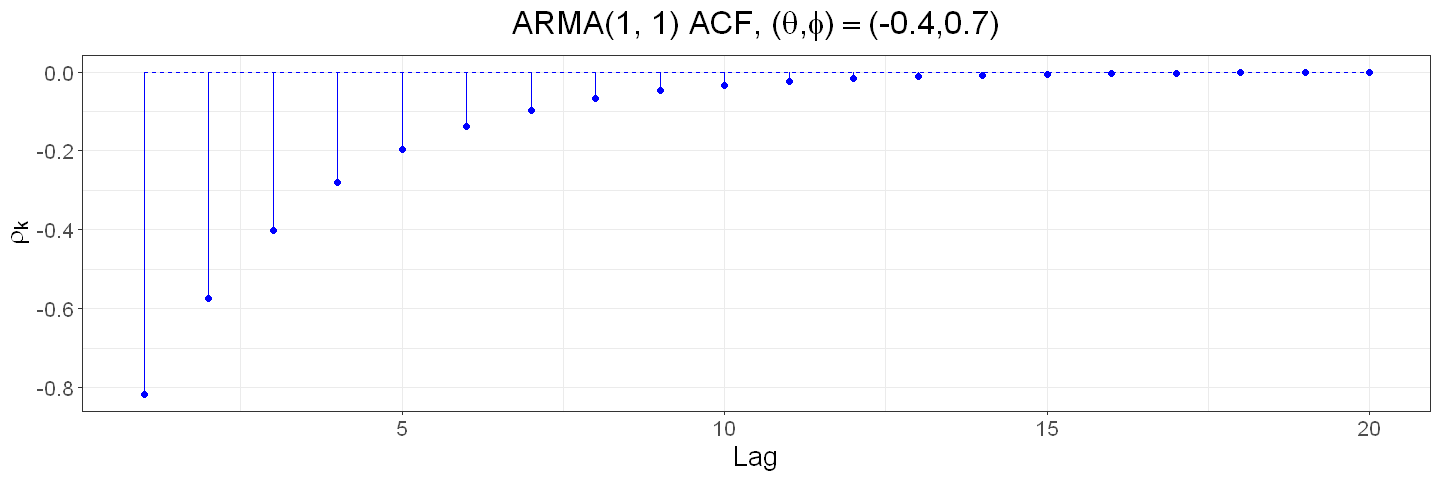

In [25]:
plot_arma11_acf(phi=0.7, theta=-0.4)

Note the change in scale in the y-axis.